In [1]:
import json
import csv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import scipy.stats as st

1. Reading the Starbucks Dataset

In [2]:
df1= pd.read_csv("Starbucks satisfactory survey.csv")

In [3]:
df1.head()

,Timestamp,Gender,Age,Status,Annual_Income,Visit_Frequency,Service_Preferred,Time_Spent,Distance,Membership,Product,Avg_money_spent,Ratimg_vs_otherbrand,Price_rating,Sales_promotion_importance,Ambience,Wifi_Quality,Service_Rating,Meeting_hangout,Promotion_Source,Loyalty
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,Coffee,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,Cold drinks;Pastries,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,Coffee,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,2019/10/01 12:39:08 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,Coffee,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,2019/10/01 12:39:20 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,Coffee;Sandwiches,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Timestamp                   122 non-null    object
 1   Gender                      122 non-null    object
 2   Age                         122 non-null    object
 3   Status                      122 non-null    object
 4   Annual_Income               122 non-null    object
 5   Visit_Frequency             122 non-null    object
 6   Service_Preferred           121 non-null    object
 7   Time_Spent                  122 non-null    object
 8   Distance                    122 non-null    object
 9   Membership                  122 non-null    object
 10  Product                     122 non-null    object
 11  Avg_money_spent             122 non-null    object
 12  Ratimg_vs_otherbrand        122 non-null    int64 
 13  Price_rating                122 non-null    int64 

In [5]:
df1.keys()

Index(['Timestamp', 'Gender', 'Age', 'Status', 'Annual_Income',
       'Visit_Frequency', 'Service_Preferred', 'Time_Spent', 'Distance',
       'Membership', 'Product', 'Avg_money_spent', 'Ratimg_vs_otherbrand',
       'Price_rating', 'Sales_promotion_importance', 'Ambience',
       'Wifi_Quality', 'Service_Rating', 'Meeting_hangout', 'Promotion_Source',
       'Loyalty'],
      dtype='object')

2. Basic cleaning of the Dataset

In [6]:
del df1["Timestamp"]

In [7]:
del df1["Promotion_Source"]

In [8]:
df1.head()

,Gender,Age,Status,Annual_Income,Visit_Frequency,Service_Preferred,Time_Spent,Distance,Membership,Product,Avg_money_spent,Ratimg_vs_otherbrand,Price_rating,Sales_promotion_importance,Ambience,Wifi_Quality,Service_Rating,Meeting_hangout,Loyalty
0,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,Coffee,Less than RM20,4,3,5,5,4,4,3,Yes
1,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,Cold drinks;Pastries,Less than RM20,4,3,4,4,4,5,2,Yes
2,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,Coffee,Less than RM20,4,3,4,4,4,4,3,Yes
3,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,Coffee,Less than RM20,2,1,4,3,3,3,3,No
4,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,Coffee;Sandwiches,Around RM20 - RM40,3,3,4,2,2,3,3,Yes


In [27]:
#columnsToBeEncoded = ['Age', 'Status', 'Annual_Income', 'Visit_Frequency', 'Service_Preferred', 'Time_Spent', 'Distance', 'Membership', 'Product', 'Avg_money_spent', 'Loyalty' ]
#encoded_df = pd.get_dummies(data = df1, columns =  columnsToBeEncoded)
#encoded_df.head()

,Gender,Ratimg_vs_otherbrand,Price_rating,Sales_promotion_importance,Ambience,Wifi_Quality,Service_Rating,Meeting_hangout,Age_40 and above,Age_Below 20,Age_From 20 to 29,Age_From 30 to 39,Status_Employed,Status_Housewife,Status_Self-employed,Status_Student,"Annual_Income_Less than RM25,000","Annual_Income_More than RM150,000","Annual_Income_RM100,000 - RM150,000","Annual_Income_RM25,000 - RM50,000","Annual_Income_RM50,000 - RM100,000",Visit_Frequency_Daily,Visit_Frequency_Monthly,Visit_Frequency_Never,Visit_Frequency_Rarely,Visit_Frequency_Weekly,Service_Preferred_Dine in,Service_Preferred_Drive-thru,Service_Preferred_I dont like coffee,Service_Preferred_Never,Service_Preferred_Never,Service_Preferred_Never buy,Service_Preferred_Take away,Service_Preferred_never,Time_Spent_Below 30 minutes,Time_Spent_Between 1 hour to 2 hours,Time_Spent_Between 2 hours to 3 hours,Time_Spent_Between 30 minutes to 1 hour,Time_Spent_More than 3 hours,Distance_1km - 3km,Distance_more than 3km,Distance_within 1km,Membership_No,Membership_Yes,Product_Coffee,Product_Coffee;Cold drinks,Product_Coffee;Cold drinks;Juices;Pastries;Sandwiches,Product_Coffee;Cold drinks;Pastries;Sandwiches,Product_Coffee;Juices;Pastries;Sandwiches,Product_Coffee;Pastries,Product_Coffee;Pastries;Sandwiches,Product_Coffee;Sandwiches,Product_Cold drinks,Product_Cold drinks;Juices;Pastries,Product_Cold drinks;Never,Product_Cold drinks;Pastries,Product_Cold drinks;Pastries;Sandwiches,Product_Jaws chip,Product_Never,Product_Never buy any,Product_Nothing,Product_Pastries,Product_cake,Product_never,Avg_money_spent_Around RM20 - RM40,Avg_money_spent_Less than RM20,Avg_money_spent_More than RM40,Avg_money_spent_Zero,Loyalty_No,Loyalty_Yes
0,Female,4,3,5,5,4,4,3,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,Female,4,3,4,4,4,5,2,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,Male,4,3,4,4,4,4,3,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,Female,2,1,4,3,3,3,3,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,Male,3,3,4,2,2,3,3,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [9]:
from sklearn.preprocessing import LabelEncoder

columnsToBeEncoded = ['Gender', 'Age', 'Status', 'Annual_Income', 'Visit_Frequency', 'Service_Preferred', 'Time_Spent', 'Distance', 'Membership', 'Product', 'Avg_money_spent', 'Loyalty' ]

df1['Age'] = LabelEncoder().fit_transform(df1['Age'])
df1['Gender'] = LabelEncoder().fit_transform(df1['Gender'])
df1['Status'] = LabelEncoder().fit_transform(df1['Status'])
df1['Annual_Income'] = LabelEncoder().fit_transform(df1['Annual_Income'])
df1['Visit_Frequency'] = LabelEncoder().fit_transform(df1['Visit_Frequency'])
#df1['Service_Preferred'] = LabelEncoder().fit_transform(df1['Service_Preferred'])
df1['Time_Spent'] = LabelEncoder().fit_transform(df1['Time_Spent'])

df1.dropna()
df1.isnull().values.any()
df1.head()

,Gender,Age,Status,Annual_Income,Visit_Frequency,Service_Preferred,Time_Spent,Distance,Membership,Product,Avg_money_spent,Ratimg_vs_otherbrand,Price_rating,Sales_promotion_importance,Ambience,Wifi_Quality,Service_Rating,Meeting_hangout,Loyalty
0,0,2,3,0,3,Dine in,3,within 1km,Yes,Coffee,Less than RM20,4,3,5,5,4,4,3,Yes
1,0,2,3,0,3,Take away,0,1km - 3km,Yes,Cold drinks;Pastries,Less than RM20,4,3,4,4,4,5,2,Yes
2,1,2,0,0,1,Dine in,3,more than 3km,Yes,Coffee,Less than RM20,4,3,4,4,4,4,3,Yes
3,0,2,3,0,3,Take away,0,more than 3km,No,Coffee,Less than RM20,2,1,4,3,3,3,3,No
4,1,2,3,0,1,Take away,3,1km - 3km,No,Coffee;Sandwiches,Around RM20 - RM40,3,3,4,2,2,3,3,Yes


In [10]:
#df1['Service_Preferred'] = LabelEncoder().fit_transform(df1['Service_Preferred'])
df1['Distance'] = LabelEncoder().fit_transform(df1['Distance'])
df1['Membership'] = LabelEncoder().fit_transform(df1['Membership'])
df1['Avg_money_spent'] = LabelEncoder().fit_transform(df1['Avg_money_spent'])
df1['Product'] = LabelEncoder().fit_transform(df1['Product'])
df1['Loyalty'] = LabelEncoder().fit_transform(df1['Loyalty'])

df1.dropna()
df1.isnull().values.any()
df1.head()

,Gender,Age,Status,Annual_Income,Visit_Frequency,Service_Preferred,Time_Spent,Distance,Membership,Product,Avg_money_spent,Ratimg_vs_otherbrand,Price_rating,Sales_promotion_importance,Ambience,Wifi_Quality,Service_Rating,Meeting_hangout,Loyalty
0,0,2,3,0,3,Dine in,3,2,1,0,1,4,3,5,5,4,4,3,1
1,0,2,3,0,3,Take away,0,0,1,11,1,4,3,4,4,4,5,2,1
2,1,2,0,0,1,Dine in,3,1,1,0,1,4,3,4,4,4,4,3,1
3,0,2,3,0,3,Take away,0,1,0,0,1,2,1,4,3,3,3,3,0
4,1,2,3,0,1,Take away,3,0,0,7,0,3,3,4,2,2,3,3,1


In [11]:
del df1['Service_Preferred']

In [12]:
df1.head()

,Gender,Age,Status,Annual_Income,Visit_Frequency,Time_Spent,Distance,Membership,Product,Avg_money_spent,Ratimg_vs_otherbrand,Price_rating,Sales_promotion_importance,Ambience,Wifi_Quality,Service_Rating,Meeting_hangout,Loyalty
0,0,2,3,0,3,3,2,1,0,1,4,3,5,5,4,4,3,1
1,0,2,3,0,3,0,0,1,11,1,4,3,4,4,4,5,2,1
2,1,2,0,0,1,3,1,1,0,1,4,3,4,4,4,4,3,1
3,0,2,3,0,3,0,1,0,0,1,2,1,4,3,3,3,3,0
4,1,2,3,0,1,3,0,0,7,0,3,3,4,2,2,3,3,1


In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [81]:
X = df1.iloc[:,7:8].values
y = df1.iloc[:,-1].values

In [82]:
#import numpy as np
# Feature extraction
test = SelectKBest(score_func=chi2, k=1)
fit = test.fit(X, y)

# Summarize scores
#np.set_printoptions(precision=1)
print(fit.scores_)

#features = fit.transform(X)
# Summarize selected features
#print(features[0:5,:])

[7.2]


In [83]:
from sklearn.model_selection import train_test_split
x = df1.drop('Loyalty', axis=1)
y = df1['Loyalty']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [84]:
from sklearn.linear_model import LinearRegression
len_reg = LinearRegression()
len_reg.fit(x_train,y_train)
y_pred = len_reg.predict(x_test)

0.2547542721536403


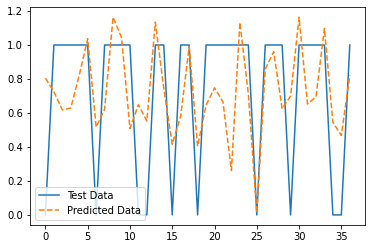

In [85]:
#validating

from sklearn.metrics import r2_score
prediction_score = r2_score(y_test, y_pred)
print(prediction_score)
plt.plot(range(len(y_test)), y_test, label = "Test Data", linestyle="-")
plt.plot(range(len(y_test)), y_pred, label = "Predicted Data", linestyle="--")
plt.legend()
plt.show()